<center><font color='green' size=\"100\" ><b> Assignment 1 </b></font></center>
<p></p>
<center><font color='#009933' size=\"5\" ><b> NLP </b></font></center>
<p></p>
<center><font color='#009999' size=\"3\" ><b> Yair Zohav 203073242 Adi Magen 311335400 </b></font></center>

List of packages to install (pip install):
1. textstat
2. chainer

### Section 1.1 Data Exploration


#### 1.1.1 Gathering and Cleaning Up Data


In [0]:
import nltk
nltk.download('punkt')
from nltk import ngrams
from collections import Counter
from functools import reduce
from statistics import mean, stdev
import textstat
import matplotlib.pyplot as plt
import matplotlib
import nltk, re, string
from collections import Counter
from timeit import default_timer as timer
from numpy import sin, pi
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def words(text): return re.findall(r'\w+', text.lower())


# ptb_preprocess(filenames, top=10000) which given a list of filenames pre-processes
# the files and outputs the re-formatted files with an additional file extension
# (for example, file1.txt as input will generate file1.txt.out).
def ptb_preprocess(filenames, top=10000):
    for filename in filenames:
        with open(filename) as f:
            text = f.read().lower()
            f.close()

        # tokenize sentences and words
        sentences = nltk.sent_tokenize(text)
        token_sentences = list(map(nltk.word_tokenize, sentences))

        lst = list(map(lambda s: ' '.join(s), token_sentences))
        new_text = '\n'.join(lst)
        top_words = [a for a, b in Counter(words(new_text)).most_common(top)]

        # process sentences and write the result to filename.out
        out_sentences = list(map(lambda ts: process_sentences(ts, top_words), token_sentences))
        with open(filename + '.out', 'w') as outfile:
            for sentence in out_sentences:
                outfile.write('%s\n' % sentence)
            outfile.close()


def isDigit(str):
    for i in range(len(str)):
        if str[i].isdigit():
            return True
    return False

def process_sentences(token_sentences, top_words):
    # repalce all number with 'N' and remove all punctuation
    processed_words_lst = list(map(repalce_digits, token_sentences))

    # replace all not top words with <unk>
    for i in range(len(processed_words_lst)):
        if processed_words_lst[i] not in top_words and not isDigit(token_sentences[i]):
            processed_words_lst[i] = '<unk>'

    processed_words_lst = list(filter(find_punctuation, processed_words_lst))
    # join back the separated words
    return ' '.join(processed_words_lst)


# repalce all number by 'N'
def repalce_digits(s):
    return re.sub('[%s]+' % string.digits, 'N', s)


# return True if there is no punctuation else False
def find_punctuation(s):
    if s == '<unk>':
        return True
    return not re.match('[%s]' % string.punctuation, s)

#### tests:

In [0]:
ptb_preprocess(['./tets1.txt'], 3)

In the file *tets1.txt.out* we can observe that the ```ptb_preproces``` divide all the sentences such each one was it's own line. Although, in the input file (*test1.txt*) this is not the case.

In [0]:
ptb_preprocess(['./test2.txt'], 10)

In the file *tets2.txt.out* we can see that all the numbers we worked so hard to get are in fact gone. 😢 But on a happy note we can see all of 2299 them turned into ```N```.

In more details we can see that the *4th* was transform into *```N <unk>```*. And the number *25.5* turned to be ```N.N```

In [0]:
ptb_preprocess(['./test3.txt'], 100)

In the file *tets3.txt.out* we can see that quotation marks of the quotes gone and we can  barely recognize them. In additon we can see that some of the abbreviations remain almost untach by the  ```ptb_preproces``` like ```NOV``` which became ```nov```. 

I would like to add the we can observe the all output files as no uppercase. And don't has a largevocabulary because of the filtering of not common words.

#### 1.1.2 Gathering Basic Statistics


We are software engineers, so we like objects:

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
class CorpusInfo:
    def __init__(self):
        self.tokenized_words = None
        self.number_of_tokens = None
        self.number_of_chars = None
        self.number_of_distinct_words = None
        self.number_of_dev_distinct_words = None
        self.top_N_numb_of_tokens = None
        self.type_token_ratio = None
        self.avg_char = None
        self.stand_chars_deviation = None
        self.n_gram_words2 = None
        self.n_gram_words3 = None
        self.n_gram_words4 = None
        self.n_grams_chars2 = None
        self.n_grams_chars3 = None
        self.n_grams_chars4 = None
        self.n_grams_chars5 = None
        self.n_grams_chars6 = None
        self.n_grams_chars7 = None

In [0]:
def get_N_gram_words(train_corpus, n_list):
    sentences = nltk.sent_tokenize(train_corpus)
    grams_dict = {}
    for n in n_list:
        grams_dict[n] = []
    for sentence in sentences:
        splitted_sent = sentence.split()
        for n in n_list:
            for k in range(len(splitted_sent) - (n - 1)):
                grams = ' '.join([splitted_sent[k + j] for j in range(n)])
                grams_dict[n].append(grams)

    # no dup elements, and we only want to know the length.
    for k in n_list:
        grams_dict[k] = len(set(grams_dict[k]))
    return grams_dict

def get_N_gram_chars(train_corpus, n_list):
    sentences = nltk.sent_tokenize(train_corpus)
    grams_dict = {}
    for n in n_list:
        grams_dict[n] = []
    for sentence in sentences:
        for n in n_list:
            for k in range(len(sentence) - (n - 1)):
                grams = ''.join([sentence[k + j] for j in range(n)])
                grams_dict[n].append(grams)

    # no dup elements, and we only want to know the length.
    for k in n_list:
        grams_dict[k] = len(set(grams_dict[k]))
    return grams_dict

def file_to_text(train_filename, dev_filename):
    dev_corpus = None
    with open(train_filename) as f:
        train_corpus = f.read().lower()
        f.close()
        if dev_filename is not None:
            with open(dev_filenames) as f:
                dev_corpus = f.read().lower()
                f.close()
    return train_corpus, dev_corpus

def get_avg_char(tokenized_words):
    return mean(list(map(lambda word: len(word), tokenized_words)))

def get_stand_dev(tokenized_words):
    return stdev(list(map(lambda word: len(word), tokenized_words)))

def get_top_N(text, top):
    top_words = Counter(words(text)).most_common(top)
    # turns out that there is no way to reduce list of tuples with functools.reduce.
    acc = 0
    for (_, count) in top_words:
        acc = acc + count
    return acc

def exctract_info(train_filenames, dev_filenames=None, top=10000):
    CorpusInfo_list = []

    if dev_filenames is not None and len(train_filenames) != len(dev_filenames):
        raise ValueError('Number of train_filenames not equal to dev filenames')
    for i in range(len(train_filenames)):
        train_corpus, dev_corpus = file_to_text(train_filenames[i],
                                                None if dev_filenames is None else dev_filenames[i])
        _corpusInfo = CorpusInfo()
        _corpusInfo.tokenized_words = nltk.word_tokenize(train_corpus)
        _corpusInfo.number_of_tokens = len(_corpusInfo.tokenized_words)
        _corpusInfo.number_of_chars = textstat.char_count(train_corpus, ignore_spaces=True)
        _corpusInfo.number_of_distinct_words = len(set(words(train_corpus)))
        # The number of types that appear in the dev data but not the training data
        if dev_corpus is not None:
            _corpusInfo.number_of_dev_distinct_words = \
                len(set(words(dev_corpus)) - set(words(train_corpus)))
        # The total number of tokens corresponding to the top-N most frequent words in the vocabulary
        _corpusInfo.top_N_numb_of_tokens = get_top_N(train_corpus, top)
        # TTR is the ratio obtained by dividing the types (the total number of different words)
        # occurring in a text or utterance by its tokens (the total number of words).
        _corpusInfo.type_token_ratio = _corpusInfo.number_of_distinct_words / _corpusInfo.number_of_tokens
        # The average number and standard deviation of characters per token
        _corpusInfo.avg_char = get_avg_char(_corpusInfo.tokenized_words)
        _corpusInfo.stand_chars_deviation = get_stand_dev(_corpusInfo.tokenized_words)

        # The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4.
        grams_dict = get_N_gram_words(train_corpus, [2, 3, 4])
        _corpusInfo.n_gram_words2 = grams_dict[2]
        _corpusInfo.n_gram_words3 = grams_dict[3]
        _corpusInfo.n_gram_words4 = grams_dict[4]


        # The total number of distint n-grams of characters that appear for n=2,3,4,5,6,7.
        n_grams_chars_dict = get_N_gram_chars(train_corpus, [2, 3, 4, 5, 6, 7])
        _corpusInfo.n_grams_chars2 = n_grams_chars_dict[2]
        _corpusInfo.n_grams_chars3 = n_grams_chars_dict[3]
        _corpusInfo.n_grams_chars4 = n_grams_chars_dict[4]
        _corpusInfo.n_grams_chars5 = n_grams_chars_dict[5]
        _corpusInfo.n_grams_chars6 = n_grams_chars_dict[6]
        _corpusInfo.n_grams_chars7 = n_grams_chars_dict[7]

        CorpusInfo_list.append(_corpusInfo)

    return CorpusInfo_list

In [0]:
corpus_list =['./shakespeare_input.txt']
info_list = exctract_info(corpus_list)

In [0]:
for i in range(len(info_list)):
    corpus_info = info_list[i]
    print('-----------------'+corpus_list[i]+'-----------------')
    print('num of tokens ' + str(corpus_info.number_of_tokens))
    print('num of chars ' + str(corpus_info.number_of_chars))
    print('number of distinct words ' + str(corpus_info.number_of_distinct_words))
    print('number of dev distinct words ' + str(corpus_info.number_of_dev_distinct_words))
    print('common N num of tokens ' + str(corpus_info.top_N_numb_of_tokens))
    print('type token ratio ' + str(corpus_info.type_token_ratio))
    print('avg char length ' + str(corpus_info.avg_char))
    print('stand chars deviation ' + str(corpus_info.stand_chars_deviation))
    print('number of bigram words ' + str(corpus_info.n_gram_words2))
    print('number of 3gram_words ' + str(corpus_info.n_gram_words3))
    print('number of 4gram_words ' + str(corpus_info.n_gram_words4))
    print('number of bigrams_chars ' + str(corpus_info.n_grams_chars2))
    print('number of 3gram_words ' + str(corpus_info.n_grams_chars3))
    print('number of 4gram_words ' + str(corpus_info.n_grams_chars4))
    print('number of 5gram_words ' + str(corpus_info.n_grams_chars5))
    print('number of 6gram_words ' + str(corpus_info.n_grams_chars6))
    print('number of 7gram_words ' + str(corpus_info.n_grams_chars7))

-----------------shakespeare_input.txt-----------------
num of tokens 1046577
num of chars 3877146
number of distinct words 22582
number of dev distinct words None
common N num of tokens 837209
type token ratio 0.021577007711807157
avg char length 3.544834254909099
stand chars deviation 2.2437712034750787
number of bigram words 370166
number of 3gram_words 626181
number of 4gram_words 662893
number of bigrams_chars 894
number of 3gram_words 10047
number of 4gram_words 57807
number of 5gram_words 206419
number of 6gram_words 520118
number of 7gram_words 984151


### Section 1.2 n-gram Word Language Model

#### 1.2.1



Our the data structure of the n-gram model will be a collection of ```defualtdict(Counter)```. This is a dictionary which the ```dict.value``` is a ```Counter (word,number of occurs)```
the key will be the history, such that by a given history we will have a list of ```(words,number of occurs)```. The number of occurs will affect the probability that the according word is matched to the given history.

The minimal abstract interface the ```lm``` should have is:

1. ```train_word_lm```: 

>by given ```dataset``` and ```n``` for the size of the ngram.

2. ```predicted_words```: 

> input : ```lm, history```

> output: sorted (by prob) list of possible outcomes.

3. ```perplexity```: 

> input: a ```dataset```.

> output: cunpute the perplexity of it.

4. ```entropy```:

> input: a ```dataset```.

> output: cunpute the entropy of it.

5. ```logprob```: 

> by given ```word``` and ```context``` evaluate the (negative) log probability of the ```word``` in this ```context```.

6. ```prob```:

>  by given ```word``` and ```context``` evaluate the probability of the ```word``` in this ```context```.

#### 1.2.2 How much memory do you expect a model to occupy?  Refer to the statistics results above and provide worst-case estimates as well as expected).




Worst - case is for all history of size $n- 1$ each word would have a probility to be predicted. That means the data structure will hold all the posibale ngrams. Additionally the  data structure will hold the the ngrams for the padding at the beginig  $n - 1$ ngrams.

What I'm trying to say is, if we let $V$ be the numbers of distinct words. Then $V^n$ is the number of distinct ngram. At the worst - case scenario the data structure will hold all the $V^n$ ngrams plus the $n-1$ ngrams with the padding.

Now let's consider that each word is the size of $len(word)\times sizeof(char)$. Witch means that the size of a given ngram $(W_1 W_2 ... W_n)$ is of size $ \sum_{i=1}^n len(W_i) \times sizeof(char)$.

And let's not forget that  for each ngram the data structure hold its probbility as a float number of size $sizeof(float)$.
 
 According to all of this the size of the  data structure will be :
 \begin{align}
\\(V^n + (n -1))(avgLen\times sizeof(char)\times n + sizeof(float)) \\
\end{align}
Where $avgLen$ is the average length of a word.


In [0]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def train_word_lm(data, order=2):
    pad = '* ' * order
    data = (pad + data).split()

    sequence = [(' '.join(data[i: i + order]), data[i + order]) for i in range(len(data) - order)]
    cfd = nltk.ConditionalFreqDist(sequence)
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

## Section 1.3 Language Model Evaluation

### 1.3.1 Perplexity

### 1.3.1.1

In [0]:
import nltk


def _estimator(fdist, *estimator_args, **estimator_kwargs):
    """
    Default estimator function using a SimpleGoodTuringProbDist.
    """
    # can't be an instance method of NgramModel as they
    # can't be pickled either.
    return nltk.LidstoneProbDist(fdist, *estimator_args, **estimator_kwargs)


class N_gram:

    def __init__(self, n, train, estimator=None, *estimator_args, **estimator_kwargs):


        # make sure n is greater than zero, otherwise print it
        assert (n > 0), n
        order = n - 1
        self.train_size = len(train.split())
        # For explicitness save the check whether this is a unigram model
        self.is_unigram_model = (n == 1)
        # save the ngram order number
        self._n = n
        self.isSmoothing = False
        if estimator is None:
            self.isSmoothing = True
            estimator = _estimator

        pad = '* ' * order
        data = (pad + train).split()

        sequence = [(' '.join(data[i: i + order]), data[i + order]) for i in range(len(data) - order)]
        self.cfd = nltk.ConditionalFreqDist(sequence)
        self.cpd = nltk.ConditionalProbDist(self.cfd, estimator, *estimator_args, **estimator_kwargs)
        self.optimize_cpd() #sorting freqDist inside cpd to ensure o(1) when taking the best result
        # self._probdist = estimator(self.cfd, *estimator_args, **estimator_kwargs)

    def optimize_cpd(self):
        for key in self.cpd.keys():
            fdist = self.cpd[key]._freqdist
            tuples = zip(fdist.keys(), fdist.values())
            tuples = dict(sorted(tuples, key=lambda tuple: tuple[1], reverse=True))
            self.cpd[key]._freqdist = nltk.FreqDist(tuples)

    def perplexity(self, dataset):
        """
        Calculates the perplexity of the given text.
        This is simply 2 ** cross-entropy for the text.

        :param text: words to calculate perplexity of
        :type text: list(str)
        """

        return pow(2.0, self.entropy(dataset))

    def entropy(self, text):
        """
        Calculate the approximate cross-entropy of the n-gram model for a
        given evaluation text.
        This is the average log probability of each word in the text.

        :param text: words to use for evaluation
        :type text: list(str)
        """
        order = self._n - 1
        e = 0.0
        for i in range(order, len(text)):
            context = ' '.join(text[i - order:i])
            token = text[i]
            logprob = self.logprob(token, context)
            if logprob is not None: #ignore prob = 0
                e += logprob
        return e / float(len(text))

    def logprob(self, word, context):
        from math import log
        """
        Evaluate the (negative) log probability of this word in this context.

        :param word: the word to get the probability of
        :type word: str
        :param context: the context the word is in
        :type context: list(str)
        """
        prob = self.prob(word, context)
        if prob == 0:
            return None #ignore prob = 0
        return -log(prob, 2)

    def prob(self, word, context):
        """
        Evaluate the probability of this word in this context using Katz Backoff.

        :param word: the word to get the probability of
        :type word: str
        :param context: the context the word is in
        :type context: list(str)
        """
        return self.cpd[context].prob(word)

Now we will load the PTB data set as 2 set of train and val. And train our N-gram model on  train on the train set.

In [0]:
import chainer

train, val, test = chainer.datasets.get_ptb_words()
ptb_dict = chainer.datasets.get_ptb_words_vocabulary()
ptb_dict = dict(zip(ptb_dict.values(), ptb_dict.keys()))
train_str = ' '.join(list(map(lambda x: ptb_dict[x], train)))
val_list = list(map(lambda x: ptb_dict[x], val))
test_list = list(map(lambda x: ptb_dict[x], test))

Let's check the preplexity on the val set.

But, we should pay attention for a little problem, some words will not occure in a given context in our train dataset, in other words , P(w|history) = 0 for these words. pp is not defined in this case and there are several ways to overcome the problem. 

1) Smoothing (will be implmented next).

2) Backoff - looking for the given word in n-1 gram and n-2 length of history in a recursive manner.

3) To give this type of words a low probability, for example, 1/|V| or same as the lowest frequent word in the corpus. But still, the perplexity will be an estimation only.

4) To not count this words in the pp calculation. the meaning will be that the pp value will be much lower then it should really be. We can see that in the next cell. 

In [0]:
lm = N_gram(2, train_str, nltk.MLEProbDist)
print(lm.perplexity(val_list))

26.55266337882647


### 1.3.1.2 now, we will improve the model by using a smoothing technique

To do that we will use the Lidstone estimator, and see what is happening while we change the value of the hyper-parameter $\gamma$ between $0$ and $1$.

In [0]:
import numpy as np
gamma_list=np.linspace(0, 1, num=10,endpoint=False)[1:]
perplexity_list = []
for gamma in gamma_list:
    temp_lm = N_gram(2, train_str, None, gamma)
    perplexity_list.append(temp_lm.perplexity(val_list))

In [0]:
print('Gamma | Perplexity')
print('-------------------------------')
for i in range(len(gamma_list)):
  print(str(gamma_list[i])[:3] + ' | {}'.format(perplexity_list[i]))

Gamma | Perplexity
-------------------------------
0.1 | 124.37655297640673
0.2 | 109.40184222250363
0.3 | 102.03941155260016
0.4 | 97.46582811443584
0.5 | 94.30693867692297
0.6 | 91.98896697971608
0.7 | 90.22100414225095
0.8 | 88.83667459582696
0.9 | 87.73261526723785


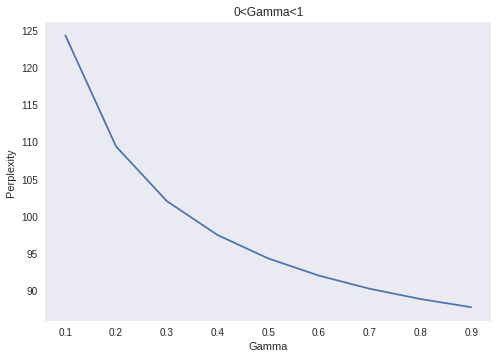

In [0]:
# Data for plotting
fig, ax = plt.subplots()
ax.plot(gamma_list, perplexity_list)
ax.set(xlabel='Gamma', ylabel='Perplexity ',
       title='0<Gamma<1')
ax.grid()
plt.show()

After learnig the the optima $\gamma$ is $0.9$. We will observe hoe the size of the n-gram is affecting the Perplexity.

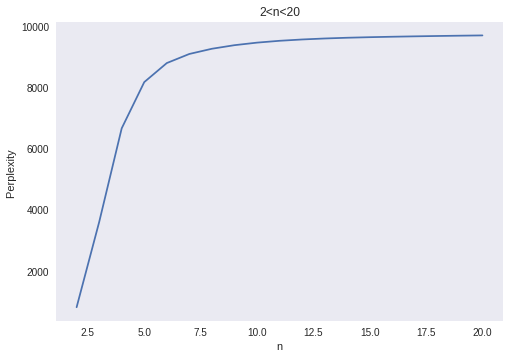

In [0]:
import numpy as np
n_list=[i for i in range(2,21)]
perplexity_list = []
gamma = 0.9
for n in n_list:
    temp_lm = N_gram(n, train_str, None, gamma,10000)
    perplexity_list.append(temp_lm.perplexity(val_list))
# Data for plotting
fig, ax = plt.subplots()
ax.plot(n_list, perplexity_list)
ax.set(xlabel='n', ylabel='Perplexity ',
       title='2<n<20')
ax.grid()
plt.show()

### 1.3.1.4 Based on the 2 graphs above,  the best predicted n-gram model based on a Lidstone model will use with $n = 2$ and $\gamma = 0.9$

In [0]:
gamma = 0.9
n = 2
optimal_lm = N_gram(n, train_str, None, gamma)
pp = optimal_lm.perplexity(test_list)
pp = round(pp, 3)
print("For n = {} and gamma = {} the perplexity is: {} ".format(n,gamma,pp))

For n = 2 and gamma = 0.9 the perplexity is: 89.572 


A recent ICLR 2018 submission (https://arxiv.org/pdf/1711.03953.pdf) claims to achieve sub-50 perplexities in language modelling on Penn Treebank.

### Now, let's check what will be the perplexity for an uniform dist:

In [0]:
def perplexity(text):
    return pow(2.0, entropy(text))

def entropy(text):
    order = 2
    e = 0.0
    number_of_words = int(len(text))
    number_of_distinct_words = int(len(set(text)))
    for i in range(order, number_of_words):
        context = ' '.join(text[i - order:i])
        token = text[i]
        e += uniform_logprob(number_of_distinct_words)
    return e / number_of_words

def uniform_logprob(number_of_distinct_words):
    from math import log
    prob = 1 / number_of_distinct_words
    return -log(prob, 2)

In [0]:
pp = round(perplexity(test_list),3)
print("Perplexity for uniform distribution = {}".format(pp))

Perplexity for uniform distribution = 6047.722


#### As we can see, our language model is not bad as the worst case scenario but also not that good as the state of the art, 50 < 89.572 < 6047.722

### 1.3.2 Generating Text from a Language Model


In a case which the seed is shorter than the history length of the n-gram model (```order```) we choosed to padd the start of the seed such that the ```len(pad+seed) = order```.

In case that the seed is longer then the history , we will take a seed suffix in a length ```= order``` as the new seed. This will be implemented by the ```seed_fixer(model_order, seed)``` method.

Another thing to think about is when the generate loop should be stopped. We thought about few condition, for example:

***1.  generated word = seed***

> When the generated word is equal to the given seed there will not be much benefit to generate more words, since our model will generate the most likely word (given history). We can say that our model is deterministic, and that all the next generated words will be repeated from the first time they were generated by the same seed.

> let  $(w_1 , w_2 , w_3 , ... w_{n-1} , w_n)$ be the $n$ generated words where $w_1 = w_n = seed$. If the loop will continue then, the next $n$ words will be the same and the text will look like:
$seed = w_1, w_2, w_3, ... w_{n-1}, w_n = seed, w_{n+2} = w_2, w_{n+3} = w_3, ... w_{2n-1} = w_{n-1}, w_{2n} = w_n = seed$ and so on..

***2. $f(x)=x$ having a fix point***

> Let's say when predicting a word by given history $= x$ $generate(x) = x$, so the all next generated words will be the same and the document suffix will be equal to $x x x .... x$. It be relevant only when ```len(history) = len(predicted word)```.

***3. length of the generated words = length of the traind text***

> Since the seed may never repeated again, and we can't let the loop go on forever we can choose ```len(text)``` to be the maximum text to generate. 


In [0]:
def generate_max(self, history):
    return list(self.cpd[history]._freqdist.keys())[0]
    
# setting a new method to a class (that's crazy)
setattr(N_gram, 'generate_max', generate_max)


def generate(model, seed):
    model_order = model._n - 1
    seed = seed_fixer(model_order, seed)
    hist = seed
    out = []
    text_size = model.train_size
    for _ in range(text_size):
        word = model.generate_max(hist)
        if word == hist: #fix point fix point fix point
            break
        hist = hist.split()
        hist = hist[1:] + [word]
        hist = ' '.join(hist)
        out.append(word)
        if word == seed:
            break
    return ' '.join(out)

def seed_fixer(model_order, seed):
    splited_seed = seed.split()
    diff_orders = len(splited_seed) - model_order
    if diff_orders > 0:  # seed longer then the model order
        seed = ' '.join(splited_seed[diff_orders:])
    if diff_orders < 0:  # seed shorter then the model order
        diff_orders *= -1
        seed = ' '.join(['*'] * diff_orders + splited_seed)
    return seed


In [0]:
optimal_lm = N_gram(2, train_str, None, 0.9)

#### 1)

In [0]:
predicted_text = generate(optimal_lm, '*')
print(predicted_text)

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> the <unk>


#### 2)

In [0]:
predicted_text = generate(optimal_lm, 'issue') 
print(predicted_text)

<eos> the <unk>


#### 3)

In [0]:
predicted_text = generate(optimal_lm, ' ')
print(predicted_text)

aer banknote berlitz calloway centrust cluett fromstein gitano guterman hydro-quebec ipo kia memotec mlx nahb punts rake regatta rubens sim snack-food ssangyong swapo wachter <eos> the <unk>


#### 4)

In [0]:
predicted_text = generate(optimal_lm, 'the')
print(predicted_text)

<unk>


#### 5)

In [0]:
predicted_text = generate(optimal_lm, 'bad')
print(predicted_text)

news <eos> the <unk>


#### 1.3.2.2  How a temperature argument can control the level of variability generated by the model


The high temperature sample displays greater linguistic variety, but the low temperature sample is more grammatically correct. Such is the world of temperature sampling - lowering the temperature allows you to focus on higher probability output sequences and smooth over deficiencies of the model.
The freezing function

Temperature sampling works by increasing the probability of the most likely words before sampling. The output probability of each word is transformed by the freezing function $f$:

\begin{equation*}f_τ(p)_i=
\frac{P_i^\frac{1}τ}{\sum(P_i^\frac{1}τ)}.
\end{equation*}

For $τ=1$, the freezing function is just the identity function. For $τ→0$, the freezing function turns sampling into the argmax function, returning the most likely output word. For $τ=0.5$, the freezing function is equivalent to squaring the probability of each output word, and then renormalizing the sum of probabilities to $1$.

#### Explain how the code in this method corresponds to the mathematical explanation provided in the blog above.

We will focus on the intersting part of the code and I will explain some of the variables with more abstraction:

$τ$ - temprature

$wps$ - is a list of the form

\begin{equation*}wps[i]= ( word_i, 
\frac{log_2(P(word_i|prev_i))}{τ} ) \end{equation*}
\begin{equation*} i=1..n
\end{equation*}
        
As we can see, when $τ$ is smaller then the second element in the tuple above. This element is a bigger number. i.e $τ\to0$ then $wps[i][2]\to\infty$.

Now let observe the variable ```tot```
\begin{equation*} 
tot_i  = {log_2 (2^{\sum_{i=1}^v \frac{P(word_i|prev_i)}{τ}}}+2^{tot_{i-1}})\\
tot_{-1}=-\infty \\
 i=1...n \end{equation*}
 
 
 This means that $tot_n\to\infty$ when $τ\to0$.
 
 With that in mind let look at the variable ```s```
 \begin{equation*} 
s_i  = {log_2 (2^{\sum_{i=1}^v P(word_i|prev_i)}}+2^{s_{i-1}})\\
 s_{-1}=-\infty \\
 i=1...n \end{equation*}
 Notice that $s_1<s_2<...<s_n \iff s_1-tot_n<s_2-tot_n<...<s_n-tot_n \iff 2^{s_1-tot_n}<2^{s_2-tot_n}<...<2^{s_n-tot_n}$.

And finally,
$p\in[0,1]$ is a random number. Which the code use as threshold. As we can see here:

```python
 for w, lp in wps:
    s = np.logaddexp2(s, lp)
    if p < pow(2, s - tot):
      word = w
      break
```
At this section of the code ``` tot ``` is $tot_n$
 

Now let look at the case that $τ\to1$. This means that $s_i\to tot_n$. Which means the $2^{s_i-tot_n}\to0$. From this we can conclude that it will be more difficult to pass the threshold $p$. That is the sempler will choos a "depper" word in $wps$ (a word with a higher index). and the "deepest" word is in fact ```EOF```. So we will sample sentences with smaller length.

For conclution, if $τ\to1$ then ```len(sampler.sample_sentence([]))```$\to\infty$

## 1.4 Character language model

#### 1.4.1
***summary  of: "The Unreasonable Effectiveness of Recurrent Neural Networks"***
> In the article the author train RNNs / LSTMs  character base model on different dataset and gets vary surprising observations of what the models had learn, such as how to spell English and use punctuation. In addition the author shows that the model can learn complex syntactic structures. But sometimes make mistake because the history is too long.

> The most unique results are of the Linux Source Code dataset. In this example we can see that the model generate text that do look like a legitimate C-code with use of brackets and indent correctly and even generate comments. But still the model has some common error linked to variables.

> More impressive observation is the evolution of generated text while sampling during the training of model. At the beginning of the training we can see the model discovers general word-space structure and then slowly learn words (from short ones to longer words). And much later we can see that the model picks up on longer-term dependencies.

> Another interesting result is to randomly select neuron and then look at the predicted distributions over characters. This shows as that the network keep track of the history of the text structure (URL, scops of [ ] etc.). That is, one of the neuron gradually tuned itself during training to become a detection of specific a property.

***summary  of: "The unreasonable effectiveness of Character-level Language Models"***
> The article starts by encouraging as to read the The Unreasonable Effectiveness of Recurrent Neural Networks blog post 😀. And claims that most readers are not familiar with unsmoothed maximum likelihood character level LM. So the author is giving as an explanation about that. 

> After that we are getting a demonstration of how to construct a character base model, how to use it to generate text and some samples from the model with different order (length of history). From that we can see that with longer history we get more readable result, witch par well with the examples in Andrej's post.

> Furthermore we learn from the code-generation example that the model (witch is shown in the article) did learn something that is not trivial at all. And cannot be simply observes only by looking at the last n characters. In addition we can see that when the train text has more structural complexity we have to look back at more letters in order to generate more making sense result. But this, as the author draws our attention to, make the model “lose” some knowledge, for example how to keeping good indentation.

> We can improve the model to support also keeping track of brackets and indentation but it will make it significantly more complex, and involved extra work. On the other hand LSTMs are learning it on its own, as we saw in more details at the Andrej's post.

 


#### 1.4.2 Gather the recipes dataset and prepare a dataset reader according to the structure of the files.

In [13]:
import nltk, re
nltk.download('punkt')
from collections import Counter
import textstat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
class RecipesDataset:
  def __init__(self):
    self.recipes = []
    self.all_recipes = ''
    
    for file_number in range(1000, 34000, 1000):
      file_number = 32965 if file_number == 33000 else file_number # for the last file
      with open('./lg32965/' + str(file_number) + '.mmf', 'br') as f:
        file_data = "".join(map(chr, f.read()))
        f.close()
      self.all_recipes += file_data
      split_data = file_data.split('MMMMM\r\n')[:-1]
      split_data = list(map(lambda x: x + 'MMMMM\r\n', split_data))
      self.recipes += split_data
    
  def get_number_of_recipes(self):
    return len(self.recipes)
  
  def get_number_of_tokens(self):
    return len(nltk.word_tokenize(self.all_recipes))
  
  def get_number_of_characters(self):
    return textstat.char_count(self.all_recipes, ignore_spaces=False)
  
  def get_vocabulary_size(self):
    words = lambda text: re.findall(r'\w+', text.lower())
    return len(Counter(words(self.all_recipes)))
  
  def get_word_len_distribution(self):
    words = re.findall(r'\w+', self.all_recipes.lower())
    words_lenth = [len(word) for word in words]
    return nltk.FreqDist(words_lenth)
  
  def get_recipe_size_word_distribution(self):
    words = lambda text: re.findall(r'\w+', text.lower())
    sequence = [len(words(recipe)) for recipe in self.recipes]
    return nltk.FreqDist(sequence)
  
  def get_recipe_size_char_distribution(self):
    sequence = [textstat.char_count(recipe, ignore_spaces=False) for recipe in self.recipes]
    return nltk.FreqDist(sequence)
  
rd = RecipesDataset()

#### 1.4.3 Report basic statistics about the dataset

In [15]:
print('number of recipes: {}'.format(rd.get_number_of_recipes()))
print('number of tokens: {}'.format(rd.get_number_of_tokens()))
print('number of characters: {}'.format(rd.get_number_of_characters()))
print('vocabulary_size: {}'.format(rd.get_vocabulary_size()))

number of recipes: 32963
number of tokens: 7238876
number of characters: 39236546
vocabulary_size: 46853


In [0]:
word_len_distribution = rd.get_word_len_distribution()
recipe_size_word = rd.get_recipe_size_word_distribution()
get_recipe_size_char = rd.get_recipe_size_char_distribution()

In [41]:
print('10 most common length:')
print('\tword')
print('\tlength\tfrequency\n\t---------------------------')
for word_len, freq in word_len_distribution.most_common(10):
  print('\t{}\t|\t{}'.format(word_len, freq))

10 most common length:
	word
	length	frequency
	---------------------------
	5	|	962692
	4	|	929210
	3	|	865314
	2	|	825745
	1	|	817489
	6	|	677044
	7	|	473636
	8	|	247287
	9	|	136083
	10	|	104758


In [47]:
print('10 most common recipe size in words:')
print('\trecipe size\n\tin words\tfrequency\n\t---------------------------')
for size, freq in recipe_size_word.most_common(10):
  print('\t{}\t  |\t{}'.format(size, freq))

10 most common recipe size in words:
	recipe size
	in words	frequency
	---------------------------
	137	  |	210
	115	  |	209
	131	  |	206
	142	  |	205
	133	  |	204
	120	  |	204
	157	  |	203
	139	  |	203
	138	  |	202
	145	  |	202


In [48]:
print('10 most common recipe size in chars:')
print('\trecipe size\n\tin words\tfrequency\n\t---------------------------')
for size, freq in get_recipe_size_char.most_common(10):
  print('\t{}\t  |\t{}'.format(size, freq))

10 most common recipe size in chars:
	recipe size
	in words	frequency
	---------------------------
	901	  |	45
	803	  |	45
	977	  |	42
	939	  |	42
	785	  |	42
	906	  |	41
	729	  |	41
	1068	  |	40
	848	  |	40
	894	  |	40


#### 1.4.4 Now we will split the dataset into training, dev and test sets as a 80%/10%/10% split.

In [0]:
def get_train_val_test_split(self):
  train_recipe = self.recipes[:26370] # ~80% of 32963
  val_recipe = self.recipes[26370:-3296] # ~10% of 32963
  test_recipe = self.recipes[-3296:] # ~10% of 32963
  return ''.join(train_recipe), ''.join(val_recipe), ''.join(test_recipe)

# setting a new method to a class
setattr(RecipesDataset, 'get_train_val_test_split', get_train_val_test_split)

train_recipe, val_recipe, test_recipe  = rd.get_train_val_test_split()

#### 1.4.5

In [0]:
chosen_order = 15

We choose to use $order = 15$ for two main reasons. First the dataset has a complex structer like the linux-kernel code. Second, as to the linux-kernel code, the recipes are in a format intended. 

In addition in Yoav Goldberg's article we saw that at  $order = 10$ the generated code didn't make a lot of sense and at $order = 20$ "we are ... far from keeping good indentation and brackets". So we choose to be at the middel of both ends.

#### 1.4.6 Train a char language model using either Yoav Goldberg's code (n-gram) 

In [0]:
# Train Yoav Goldberg's n-gram model
from collections import *

def train_char_lm(dataset, order=4):
    data = dataset
    lm = defaultdict(Counter)
    pad = "~" * order
    data = pad + data
    for i in range(len(data)-order):
        history, char = data[i:i+order], data[i+order]
        lm[history][char]+=1
        
    def normalize(counter):
        s = float(sum(counter.values()))
        return [(c,cnt/s) for c,cnt in counter.items()]
    
    outlm = {hist:normalize(chars) for hist, chars in lm.items()}
    return outlm

In [0]:
lm_recipes = train_char_lm(train_recipe, chosen_order)

#### 1.4.7 Report on the perplexity of the trained language model. 

In [0]:
class CalcPerplexity:
  def __init__(self, order, lm):
    self.order = order
    self.lm = lm
    self.backoffLM = None
    self.backoffCP = None
    
  def perplexity(self, dataset):
    return pow(2.0, self.entropy(dataset))

  def entropy(self, text):
    e = 0.0
    for i in range(self.order, len(text)):
        context = ''.join(text[i - self.order:i])
        token = text[i]
        _logprob = self.logprob(token, context)
        if _logprob is not None: #ignore prob = 0
            e += _logprob
    return e / float(len(text))

  def logprob(self, char, context):
    from math import log
    _prob = self.prob(char, context)
    if _prob == 0:
      if self.backoffLM is None and self.order > 1:
        self.backoffLM = train_char_lm(train_recipe, self.order - 1)
        self.backoffCP = CalcPerplexity(self.order - 1, self.backoffLM)
      return self.backoffCP.prob(char, context[1:])
    return -log(_prob, 2)

  def prob(self, char, context):
    if context in self.lm:
      context_dict = dict(self.lm[context])
      if char in context_dict:
        return context_dict[char]
    return 0

In [64]:
cp = CalcPerplexity(chosen_order, lm_recipes)
cp.perplexity(val_recipe)

1.2276265866744345

#### 1.4.8 5 generated recipes from the trained language model. 

In [0]:
# Train Yoav Goldberg's generate_text
from random import random

def generate_text(lm, order, nletters=1000):
  history = "~" * order
  out = []
  for i in range(nletters):
      c = generate_letter(lm, history, order)
      history = history[-order:] + c
      out.append(c)
  return "".join(out)

def generate_letter(lm, history, order):
  history = history[-order:]
  dist = lm[history]
  x = random()
  for c,v in dist:
      x = x - v
      if x <= 0: return c

***sample 1***

In [0]:
print(generate_text(lm_recipes, 15))

~~~ Combine all the ingredients and simmer until
  just moistened. Pour batter into two
  greased 8-inch layer pans in moderate oven (350 degrees F.) 50 minutes, or until
  cake tester inserted the center comes out
  clean. Remove the sauce pan from the
  heat and simmer until sauce boils and
  sugar mixture to the butter mix. 3.Beat the egg whites
  until stiff and shiny.  Add the melted mixture.  Spread half of mixture through a sieve that has been
  sprayed with release agent; remove from heat.
    2.  Add applesauce mixture over the walnuts, tossing to
  coat them. There are many good hot sauces to use; the one they use is
  either Durkee Franks Red Hot Sauce or Wingers Original, again found
  in a restaurant. Use smaller amounts of all
  ingredients, beat until smooth. Pour onto heated waffle baker and bake. Yield: 2 2/3 cups batter, about 4
  servings
 
MMMMM----- Recipe via Meal-Master (tm) v8.05
 
      Title: CHOCOLATE SHOTS
 Categories: Salads
      Yield:


***sample 2***

In [0]:
print(generate_text(lm_recipes, 15))

~~~~~
      5 c  Water
      3    Eggs; Large, Separated
    1/2 c  Beef stock
           -(whole), for garnish
 
  Servings: 6 to 8 Notes: Angu (pronounced "aing goo") is a sort of
  polenta, one of the many Indian breads, for example, you can make smaller kisses by using the small ones will cook
  in less than 10 minutes if picked earlier. Drain.
  
  Recipe By     : Somesh Rao
 
MMMMM
 
MMMMM----- Recipe via Meal-Master (tm) v8.05
 
      Title: CRISPY SCALLOPS WITH LEMON & PEPPER
 Categories: Cookies
      Yield: 1 Servings
 
     12 oz SR flour
      4 oz Demerara sugar
      1 c  Milk
      4    Eggs
      1 c  Olive oil
           Spice grinder
           Button mushrooms
      2 tb Confectioners' Sugar
      1 c  Brown sugar, firmly packed
      2 ts Lemon grass minced (fresh)
           -Baking Dish---
  1 3/4 c  All-purpose flour
    3/4 ts Cinnamon
    1/4 ts Ground cinnamon
        pn Ground allspice
    1/4 ts Nutmeg
    1/2 ts Cinnamon


***sample 3***

In [0]:
print(generate_text(lm_recipes, 15))

~~~~~~~~~~~~~~~~~~~~~~~~~ Combine all
  ingredients. Stir in chopped bittersweet
           -unsweetened shredded coconut
      pulp and continue to
  brown. (Don't worry if the mixture into the chicken. Sprinkle yams and chicken to
  bowl and stir briskly until well blended. Pour egg mixture over low heat, melt chocolate morsels, divided
      1 cn (8 ounce) water chestnuts or peas. Drain and add broccoli.
  
  This recipe uses raw egg white. Cases of salmonella poisoning
  have been traced to raw eggs, although this depends very much on personal taste.) Coarse shreds produce lacier latkes with rough
  edges under, seal and flute; sprinkle with the sugar to make a
  runny batter. Leave for 1 hour. Heat the oil in a small sauce- pan, add water and simmer for 20 mins. Add olives and 2 cups of
  the flour mixture. Fold
  in chips and nuts. Drop rounded teaspoonfuls onto ungreaed baking sheets. Divide the mixture
  remains cool and powdery and does not form and chill in refi


***sample 4***

In [0]:
print(generate_text(lm_recipes, 15))

` NOTES
  : Good on chicken, beef and pork
      3 tb Sugar
      4 ea Whole peppercorns
      2 ea Slices Bacon
      2 c  Buttermilk
      2 ts Paprika
      3 lb Chicken thighs, skinned
           Salt to taste and mash in the pate.
  Transfer the pie to a rack and let cook till everything is nicely coated. Mix in the onion,
  fry the pasta and return it to the oven to heat.
  
  Stir in the lime
  juice. Pour over
  remaining ingredients and blend until smooth
  (about 10 minutes, until golden
  brown. Squeese lemon juice generously over catfish.
  5. Cover with foil; let stand for about 10 minutes, stirring to prevent burning. Sprinkle the cooled bread.
  Garnish with onion slices and serve immediately over cooked pasta, such as ditalini.
  
  Recipes By: So Eat, My Darling: A Guide To Yiddish Kitchen
           -Chop toasted pecans
           Filling:
      1 lb Liverwurst
      4 tb White creme de cacao
  1 1/2 qt Vanilla ice cream
           -to 3 inc


***sample 5***

In [0]:
print(generate_text(lm_recipes, 15))

~~~~~~~~MMMMM----- Recipe via Meal-Master (tm) v8.05
 
      Title: CHOCOLATE CHIPS
      1 c  AM Potato Flakes
    1/2 c  Diced turnip optional
      2 tb Apple sauce
    3/4 c  Walnuts-chopped
    3/4 lb Butter softened
      2 c  Confectioners' sugar. Makes 9 pieces
  at 250 F. about 45 minutes or until golden and crisp, 1 to 2 minutes.
  When jello is still (not hot), fill juice glass in the center. Add the egg yolks, one at a time, beating well after
  each addition until the dough is used. Bake scones on ungreased cookie
  sheets. Reshape into round rolls, then push thumbs
  through center
  approximately three to five minutes. Add the
  mushrooms, onion and remaining sauce on
  top.
  
  *or pile mixture on small, individual gratin dishes. Fill with the nut and broccoli
  together as sauteing. Chill before serving, roll in chopped nuts. Chill.
 
MMMMM
 
MMMMM----- Recipe via Meal-Master (tm) v8.05
 
      Title: CARDAMOM BUNS
 Categories: Breakfast
   


#### 1.4.9 observations about the generated samples.

First of all let notice that only sample 5 is beginning with *$"$MMMMM----- Recipe via Meal-Master (tm) v8.05$"$*. This is very surprising observation because all of the 32963 recipes is starting with that line. So we accept it to have a high probability over all.

Second, the sentences are making sort of senes. 
> *$"$Pour batter into two
  greased 8-inch layer pans in moderate oven (350 degrees F.) 50 minutes, or until
  cake tester inserted the center comes out
  clean$"$.*
  
In this exmaple we see that the words are existing in the English language and more important there is a theme to the sentence. This one is about the finishing steps of backing a cake. 🎂

Furthermore we can see that the model picked up most of the recipes structure. For example all the recipes titles are capitalized, and the model provides recipes with good indentation.

### Section 2

#### 2.1 Drawing a given function with some noise

In [0]:
from numpy import sin, pi
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt

def generateDataset(N, f, mu, sigma):
    Xi = [i / (N - 1) for i in range(N)]
    t = [f(x) + normal(mu, sigma, 1) for x in Xi]
    # t = [ti[0] for ti in t]  # np.array to list
    return Xi, t

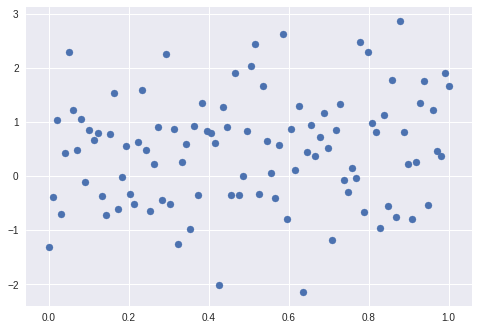

In [0]:
N = 100
x, t = generateDataset(N, sin, 0, 1)

plt.scatter(x, t)
plt.show()

#### 2.2

In [0]:
from math import pow

def OptimizeLS(x, t, M):
    n = len(x)
    phi = np.empty((n, M + 1), )
    for i in range(n):
        for j in range(M + 1):
            phi[i][j] = pow(x[i], j)
    coff = Wls(phi, t)

    def opt_poly(X):
        res = [0 for i in range(len(X))]
        for i in range(len(X)):
            acc = 0
            for j in range(M+1):
                acc += coff[j] * pow(x[i], j)
            res[i] = acc
        return res

    return opt_poly


def Wls(phi, t):
    prod = np.dot(phi.T, phi)
    i = np.linalg.inv(prod)
    m = np.dot(i, phi.T)
    return np.dot(m, t)


def sin2pi(x):
    return sin(2 * pi * x)

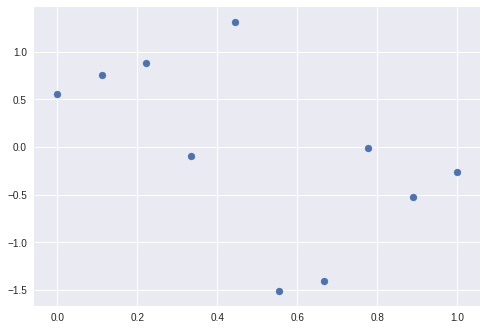

In [0]:
N = 10
x, t = generateDataset(N, sin2pi, 0, 1)

plt.scatter(x, t)
plt.show()

And now for the polynomial results : 

In [0]:
def poly_result(M):
  poly = OptimizeLS(x, t, M)
  t_prime = poly(x)
  plt.scatter(x, t_prime)
  plt.show()

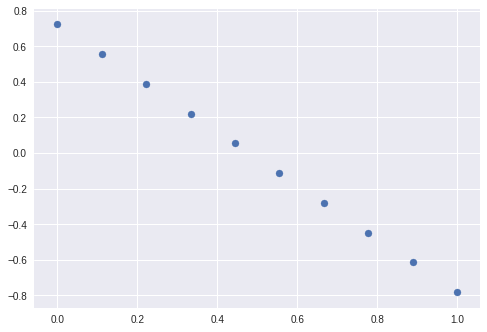

In [0]:
poly_result(1)

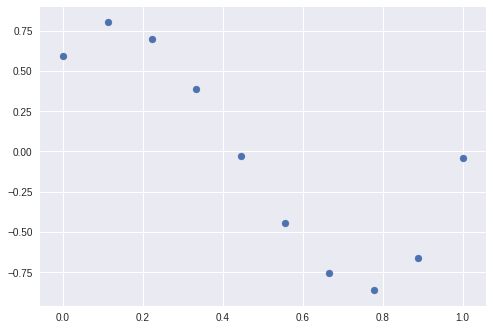

In [0]:
poly_result(3)

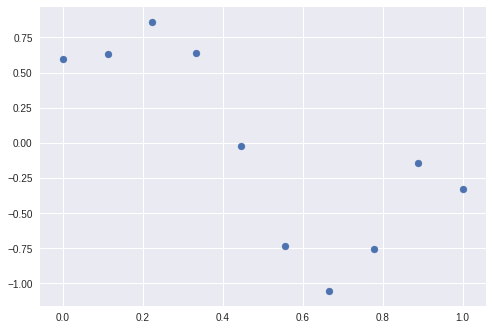

In [0]:
poly_result(5)

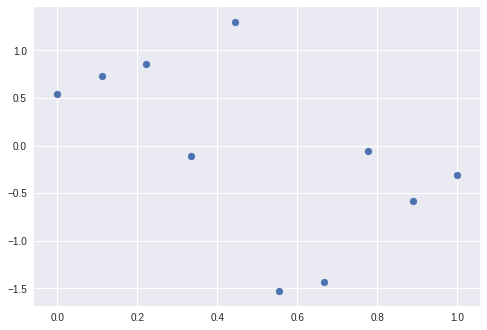

In [0]:
poly_result(10)

#### 2.3

In [0]:
def buildPhi(n, M, x):
  phi = np.empty((n, M + 1), )
  for i in range(n):
      for j in range(M + 1):
          phi[i][j] = pow(x[i], j)
  return phi

def optimizePLS_help(x, t, M, _lambda):
  phi = buildPhi(len(x), M, x)
  coff = Wpls(phi, t, _lambda)

  def opt_poly(X):
    res = [0 for i in range(len(X))]
    for i in range(len(X)):
        acc = 0
        for j in range(M+1):
            acc += coff[j] * pow(x[i], j)
        res[i] = acc
    return res

  return opt_poly

def Wpls(phi, t, _lambda):
    prod = np.dot(phi.T, phi)
    lambdaI = _lambda * np.identity(prod.shape[0])
    i = np.linalg.inv(prod + lambdaI) # ^-1
    m = np.dot(i, phi.T)
    return np.dot(m, t)

In [0]:
def generateDataset3(N, f, sigma):
  subsets_x, subsets_t = generateDataset(3 * N, f, 0, sigma)
  suffel_x = np.copy(subsets_x)
  np.random.shuffle(suffel_x)
  i = []
  for k in range(len(suffel_x)):
    i.append(np.where(subsets_x == suffel_x[k])[0][0])  
  suffel_t = np.take(subsets_t, i)
  return (suffel_x[:N], suffel_t[:N]),(suffel_x[N:-N], suffel_t[N:-N]),(suffel_x[-N:], suffel_t[-N:])

In [0]:
from math import sqrt
def NEw(x, t, poly):
  global N
  _sum = 0
  poly_x = poly(x)
  for i in range(len(t)):
    _sum += pow(t[i] - poly_x[i], 2)
  return (1 / N)*sqrt(_sum)

In [0]:
def optimizePLS(xt, tt, xv, tv, M):
  best_poly = None
  best_poly_NEw = np.inf
  
  for log_lambad in range(20, -1, -1):
    poly = optimizePLS_help(xt, tt, M, pow(2, log_lambad-40))
    poly_NEw = NEw(xv, tt, poly)
    
    if poly_NEw < best_poly_NEw:
      best_poly = poly
      poly_NEw = best_poly_NEw
      
  return best_poly

In [0]:
M = 3

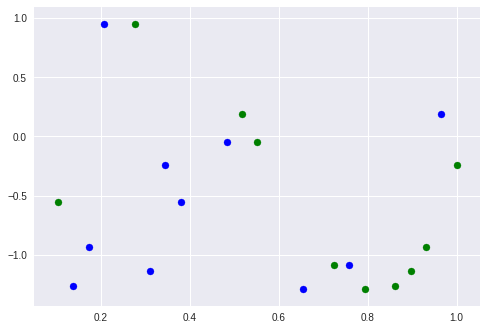

In [0]:
N = 10
(xt, tt), (xv, tv), (x_test, t_test) = generateDataset3(N, sin2pi, 1)
poly10 = optimizePLS(xt, tt, xv, tv, M)
tt_prime = poly10(xt)
plt.scatter(xt, tt_prime, c='green')
t_test_prime = poly10(x_test)
plt.scatter(x_test, t_test_prime, c='blue')
plt.show()

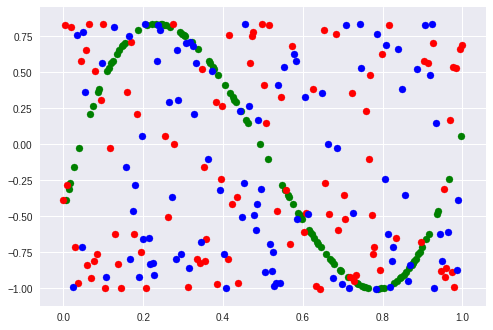

In [0]:
N = 100
(xt, tt), (xv, tv), (x_test, t_test) = generateDataset3(N, sin2pi, 1)
poly100 = optimizePLS(xt, tt, xv, tv, M)
tt_prime = poly100(xt)
plt.scatter(xt, tt_prime, c='green')
tv_prime = poly100(xv)
plt.scatter(xv, tv_prime, c='red')
t_test_prime = poly100(x_test)
plt.scatter(x_test, t_test_prime, c='blue')
plt.show()

From both plot we can obviously see that we are doing prety good on the <font color="green">train</font> set. Additionally, from the plot of $N=10$ we learn that the curve of the <font color='blue'>test</font> set as, in general, the same sahpe of the actual function. But from the plot of $N=100$ we understand that we hit the point of overfitting because only the <font color="green">train</font> curve is looking like the s$in(2\pi x)$ curve. 

#### 2.4

In [0]:
def bayesianEstimator(x, t, M, alpha, sigma2):
  def buildPhi_x(x): # x is 1 sample
    phi = np.empty((M + 1, 1), )
    for i in range(M + 1):
      phi[i][0] = pow(x, i)
    return phi
  
  # n=1...N sum(phi(x_n) * phi(x_n)^T)
  _sigmaInS = np.array([0.0 for _ in range((M + 1) * (M + 1))]).reshape((M + 1), (M + 1))
  for n in range(N):
    phi_x_n = buildPhi_x(x[n])
    _sigmaInS += np.dot(phi_x_n, phi_x_n.T)
    
  # S^-1 = (alpha * I) + [(1 / sigma2) * sum(phi(x_n) * phi(x_n)^T)] n=1...N
  alphaI = alpha * np.identity(M + 1)
  temp_S = (1 / sigma2)*_sigmaInS
  S_inverse = alphaI + temp_S
  S = np.linalg.inv(S_inverse)
  
  # n=1...N sum(phi(x_n) * t_n)
  _sigmaInM = np.array([0.0 for _ in range(10)]).reshape((M + 1), 1)
  for n in range(N):
    phi_x_n = buildPhi_x(x[n])
    _sigmaInM += phi_x_n * t[n]
    
  # (1/sigma2) * phi(x)^T * S * sum(phi(x_n) * t_n) n=1...N
  def m(x):
    res = (1 / sigma2)
    phi_x_T = buildPhi_x(x).T
    res *= phi_x_T
    res = np.dot(res, S)
    res = np.dot(res, _sigmaInM)    
    return res
  
  # sigma2 * phi(x)^T * S * phi(x)
  def var(x):
    res = sigma2
    phi_x = buildPhi_x(x)
    res *= phi_x.T
    res = np.dot(res, S)
    res = np.dot(res, phi_x)
    return res
  
  return tuple([m, var])

In [0]:
alpha = 0.005
sigma2 = 1/11.1
M = 9

In [0]:
def print_bayesian_plot(M, alpha, sigma2):
  global N
  X, T = generateDataset(N, sin2pi, 0, 1)
  (m, var) = bayesianEstimator(X, T, M, alpha, sigma2)
  
  # real sin2pi(x) in green
  real_x = np.linspace(0, 1, 101)
  real_t = np.array([sin2pi(real) for real in real_x])
  fig = plt.figure()
  ax = plt.axes()
  ax.plot(real_x, real_t, c='green')

  # m(x) in red
  t_m =  np.array([m(x) for x in X]).reshape(len(X))
  ax.plot(X, t_m, c='red')

  # (m(x) - var(x)^(1/2)) - (m(x) + var(x)^(1/2)) the  red region
  t_var =  np.array([var(x) for x in X]).reshape(len(X))
  from math import sqrt
  minus = [t_m[i] - sqrt(t_var[i]) for i in range(len(X))]
  plus =  [t_m[i] + sqrt(t_var[i]) for i in range(len(X))]
  plt.fill_between(X, minus, plus, facecolor='salmon')

  # (X , T) train set in blue 
  plt.scatter(X, T, c='blue')
  plt.show()

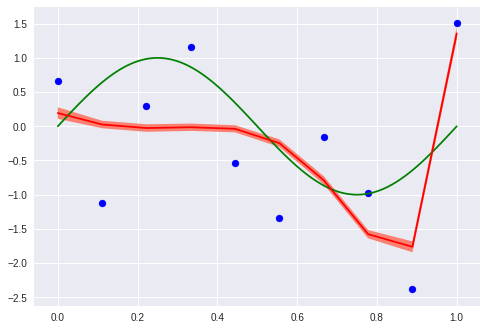

In [190]:
N = 10
print_bayesian_plot(M, alpha, sigma2)

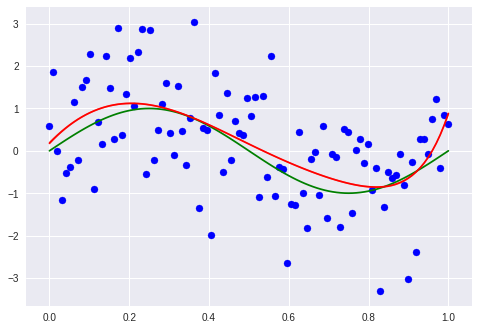

In [183]:
N = 100
print_bayesian_plot(M, alpha, sigma2)

We see that the confidence interval of the mean of the predictive distribution is vary small. In particular when $N=100$ it is so small we cannt realy see it.
At $N=10$ case we see the the confidence interval of $m(x)$ is evenly tight, becaue of it's definition $±\sqrt{var(x)}$. We can consider a diffrent definition: $±\sqrt{var(x)(1+ \frac{1}{N}})$. This definition makes the height of the confidence interval very small around more straight line and large around more curvy spots of $m(x)$.